## Data_Generation_for_Visualisation and importing to MATLAB

In [130]:
import pandas as pd
import matplotlib.pyplot as plt

In [133]:

##Preprocessing functions - Combining the first 3 rows to make the column name and dropping na values


def df_preprocess(df):
    
    df_c = df.copy(deep=True)
    df_c.columns = df_c.columns + '_'+df_c.iloc[0,:]+ '_'+df_c.iloc[1,:]
    #drop the date
    SGT750 = df_c.iloc[2:,:]
    #Change the index to sequence
    SGT750.index = range(SGT750.shape[0])
    #check na values
    nalist  = [x for x in SGT750.isna().sum() if x>0]  
    if not(nalist):
        print("No na values")
    else:
    #drop na values
        SGT750 = SGT750.dropna()
#         SGT750.reset_index(inplace = True)
        
    #Drop bleed valves
    SGT750_Balance = SGT750.iloc[:,:-3]
    return(SGT750_Balance)


##Dataframe with Bleed valves

def df_preprocess_bleed(df):
    
    df_c = df.copy(deep=True)
    df_c.columns = df_c.columns + '_'+df_c.iloc[0,:]+ '_'+df_c.iloc[1,:]
    #drop the date
    SGT750 = df_c.iloc[2:,:]
    #Change the index to sequence
    SGT750.index = range(SGT750.shape[0])
    #check na values
    nalist  = [x for x in SGT750.isna().sum() if x>0]  
    if not(nalist):
        print("No na values")
    else:
    #drop na values
        SGT750 = SGT750.dropna()
#         SGT750.reset_index(inplace = True)
#         SGT750.set_index([0])
    #Drop bleed valves
#     SGT750_Balance = SGT750.iloc[:,:-3]
    return(SGT750)

In [15]:
SGT750_90005 = pd.read_excel ('SGT-750\\SGT-750_TestFiles\\SGT-750 DD090005.xlsx',engine="openpyxl",index_col=0)
SGT750_90006 = pd.read_excel ('SGT-750\\SGT-750_TestFiles\\SGT-750 DD090006.xlsx',engine="openpyxl",index_col=0)
SGT750_90007 = pd.read_excel ('SGT-750\\SGT-750_TestFiles\\SGT-750 DD090007.xlsx',engine="openpyxl",index_col=0)

C:\Users\z004csar\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [135]:
### Write to local disk

df_preprocess(SGT750_90005).to_excel('SGT-750_Data\\CleanDataforMATLAB&PowerBI\\SGT750_90005.xlsx')
df_preprocess(SGT750_90006).to_excel('SGT-750_Data\\CleanDataforMATLAB&PowerBI\\SGT750_90006.xlsx')
df_preprocess(SGT750_90007).to_excel('SGT-750_Data\\CleanDataforMATLAB&PowerBI\\SGT750_90007.xlsx')

No na values
No na values


In [136]:
# Data_preprocess_Bleed

SGT750_90006_bleed = df_preprocess_bleed(SGT750_90006)
SGT750_90006_bleed.to_excel('SGT-750_Data\\Visualization files\\SGT750_90006_bleed.xlsx')

### Trying to fit the distribution to check the type of ditribution each of them follow

Why are we fitting distribution over a variable?<br>
We are fitting a distribution over a variable because it lets us know what kind of distroibution it follows as many of the machine klearning alfogrithms follow an assumption of the distribution.

What are the distributions we are using?<br>
The Package that we arte usign right now has around 80 distributions and is goin to give us which distribution fits the best and which gives the best results as in which hyperparameters to take and which parameters can we get from this.

In [137]:
###Trying to fit the distribution to check the type of ditribution each of them follow 
import scipy.stats as st
def get_best_distribution(data):
    dist_names = ["norm", "exponweib", "weibull_max", "weibull_min", "pareto", "genextreme","burr","beta"]
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
        print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value

    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))

    return best_dist, best_p, params[best_dist]


# may take some time since by default, all distributions are tried
# but you call manually provide a smaller set of distributions

# get_best_distribution(np.array(dddf.iloc[:,16],dtype=float))

p value for norm = 0.0
p value for exponweib = 0.0
p value for weibull_max = 0.0
p value for weibull_min = 0.0
p value for pareto = 0.0
p value for genextreme = 0.0


C:\Users\z004csar\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4530: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]


p value for burr = 2.0817219221796935e-297
p value for beta = 0.0
Best fitting distribution: burr
Best p value: 2.0817219221796935e-297
Parameters for the best fit: (96.12565827181066, 0.048775750312674324, -19.358832839970855, 39.571290201192724)


('burr',
 2.0817219221796935e-297,
 (96.12565827181066,
  0.048775750312674324,
  -19.358832839970855,
  39.571290201192724))

C:\Users\z004csar\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1790: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return integrate.quad(self._mom_integ1, 0, 1, args=(m,)+args)[0]
C:\Users\z004csar\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1790: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(self._mom_integ1, 0, 1, args=(m,)+args)[0]
C:\Users\z004csar\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1790: IntegrationWarning: The algorithm does not converge.  Roundoff e

,sumsquare_error,aic,bic,kl_div
exponpow,0.380261,1038.363962,-167440.304089,inf
beta,0.390141,760.856153,-167026.589654,inf
laplace_asymmetric,0.453374,1037.951739,-164670.145350,inf
genlogistic,0.456182,1197.780740,-164572.874146,inf
burr,0.466460,1197.513453,-164212.272575,inf


C:\Users\z004csar\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1790: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return integrate.quad(self._mom_integ1, 0, 1, args=(m,)+args)[0]


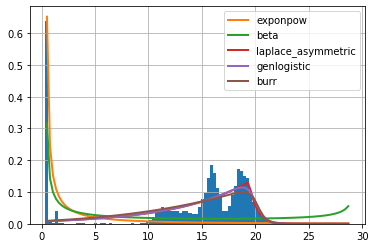

In [128]:
###Trying using fitter package
from scipy import stats
from fitter import Fitter
f = Fitter(np.array(dddf.iloc[:,16],dtype=float))
f.fit()
f.summary()


In [138]:
##Retreive the parameters
f.fitted_param['burr']


(96.12565827181066,
 0.048775750312674324,
 -19.358832839970855,
 39.571290201192724)

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

In [155]:
from itertools import combinations
for x,y in combinations(df.columns,2):
    df['Long '+x+' Short '+y]=df[x]*df[y]

In [167]:
from itertools import combinations
df = pd.DataFrame({
    'A': [5, 3, 6, 9, 2, 4],
    'B': [4, 5, 4, 5, 5, 4],
    'C': [7, 8, 9, 4, 2, 3],
    'D': [1, 3, 5, 7, 1, 0],
    'E': [7, 8, 9, 4, 2, 3],
    'F': [1, 3, 5, 7, 1, 0],
})

In [170]:
for x,y in combinations(df.columns,2):
    print(x)
    

A
A
A
A
A
B
B
B
B
C
C
C
D
D
E


In [171]:
df

,A,B,C,D,E,F
0,5,4,7,1,7,1
1,3,5,8,3,8,3
2,6,4,9,5,9,5
3,9,5,4,7,4,7
4,2,5,2,1,2,1
5,4,4,3,0,3,0


C:\Users\z004csar\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4530: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]
